# Clasificación de Movimiento

El modelo de EDGE Impulse en encuentra en el siguiente enlace https://studio.edgeimpulse.com/public/228533/latest

**a. Objetivos de la aplicación:**
1. Facilitar la comunicación entre personas sordomudas analfabetas y personas hablantes mediante el reconocimiento de lenguaje de señas y reconocimiento de voz.
2. Clasificar los movimientos de lenguaje de señas en frases predefinidas.
3. Generar videos pregrabados de lenguaje de señas correspondientes a frases habladas.
4. Integrar los componentes de reconocimiento de lenguaje de señas y reconocimiento de voz en una aplicación o chat fácil de usar.

**b. Descripción del proyecto:**

El proyecto consiste en desarrollar una aplicación o chat que permita la comunicación fluida entre personas sordomudas analfabetas y personas hablantes. Se utilizarán técnicas de reconocimiento de lenguaje de señas y reconocimiento de voz para lograr este objetivo. La aplicación permitirá que la persona sordomuda realice movimientos de lenguaje de señas frente a una cámara, los cuales serán clasificados en frases predefinidas mediante un modelo de aprendizaje automático. Luego, la frase correspondiente será enviada a la persona hablante a través de la aplicación. Del mismo modo, cuando la persona hablante diga una frase, se utilizará un modelo de reconocimiento de voz para clasificarla y se generará un video pregrabado en lenguaje de señas correspondiente a esa frase, el cual será enviado a la persona sordomuda.

**c. Referencias y fuentes de inspiración:**
- Artículo: "DeepASL: Enabling Ubiquitous and Non-Intrusive Word and Sentence-Level Sign Language Translation" de Elham Naghizade et al.
- Artículo: "Sign Language Recognition using Convolutional Neural Networks" de Surasak Sanguanpong et al.
- Repositorio de código: "https://github.com/jim-schwoebel/allie" (Allie: Una plataforma de inteligencia artificial para el reconocimiento de lenguaje de señas)

**d. Descripciones:**

• Hardware utilizado: El hardware utilizado incluirá un accelerometro para capturar los movimientos de lenguaje de señas, un dispositivo de grabación de audio para capturar las frases habladas y un dispositivo móvil para mostrar los videos pregrabados en lenguaje de señas.

• Recopilación de datos: La recopilación de datos implica grabar movimientos de personas realizando las frases de lenguaje de señas predefinidas. Estos movimeintos se etiquetarán con las frases correspondientes. Además, se recopilarán muestras de audio de las frases habladas, las cuales también se etiquetarán. Es importante contar con un conjunto de datos suficiente y diverso para entrenar los modelos de reconocimiento de lenguaje de señas y reconocimiento de voz de manera precisa.

e. Problemas u obstáculos que se presentaron y sus soluciones:
1.

 Limitado conjunto de datos: La disponibilidad de un conjunto de datos suficiente y etiquetado puede ser un desafío. Para solucionar esto, se pueden buscar bases de datos públicas, colaborar con organizaciones relacionadas o incluso grabar los propios datos utilizando voluntarios.

2. Precisión del reconocimiento: Los modelos de reconocimiento de lenguaje de señas y reconocimiento de voz pueden no ser 100% precisos, especialmente al enfrentar variaciones en los movimientos o en la pronunciación. Para mejorar la precisión, se pueden explorar técnicas de aumento de datos, entrenamiento con transferencia de aprendizaje o utilizar enfoques de ensamblaje de modelos.

3. Latencia en la comunicación: El tiempo necesario para clasificar el movimiento de lenguaje de señas y generar el video pregrabado puede afectar la fluidez de la comunicación. Para mitigar esto, se puede optimizar el procesamiento y utilizar técnicas de paralelización o inferencia en dispositivos locales.

4. Disponibilidad de hardware: Dependiendo de la plataforma en la que se implemente la aplicación, puede haber restricciones de hardware, como la calidad de la cámara o el rendimiento del dispositivo. Es importante considerar estas limitaciones al diseñar y ajustar el sistema.

In [ ]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

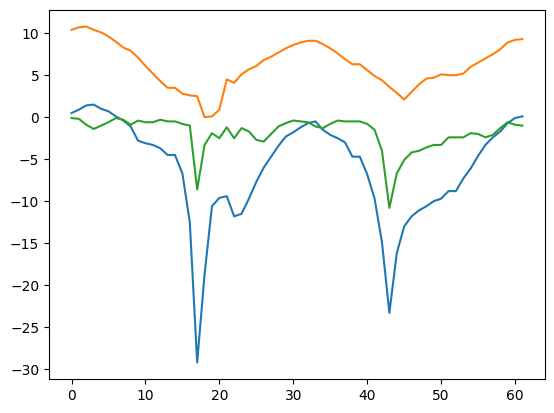

In [ ]:
RutaFile="/content/gdrive/MyDrive/Entregable1/Movimiento/training/fine.40l1cvep.ingestion-654c8ddcd7-98jk5.s1.json"

dataframe = pd.read_json(RutaFile)
print(dataframe.to_string()) 
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Entregable1/Movimiento/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*60,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*60:(i+1)*60] = DatosOriNP[0:60]
  i+=1
print(Datos.shape)



(3000, 3)


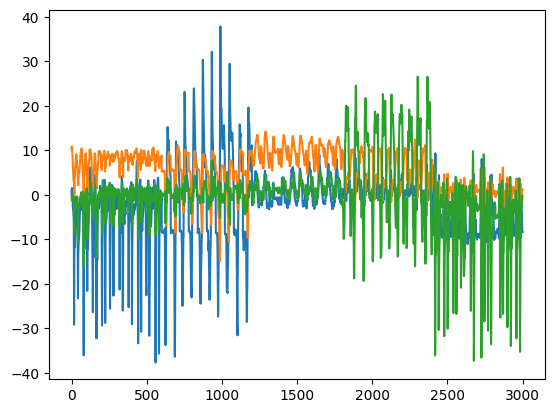

In [ ]:
plt.plot(Datos)

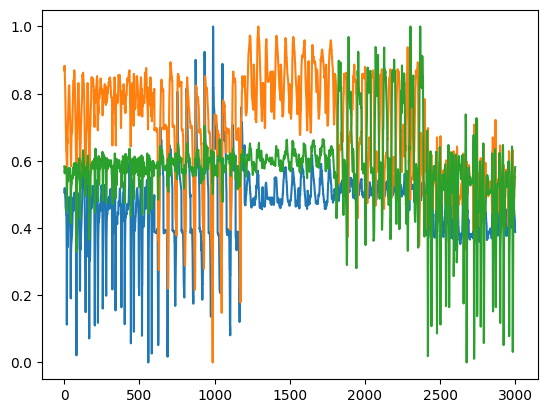

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [ ]:
Xtrain=np.zeros((50,180)) #Datos.shape[1]/60

for i in range(50):
    Xtrain[i,:]=np.concatenate((DatosN[i*60:(i+1)*60,0].T,
                                DatosN[i*60:(i+1)*60,1].T,
                                DatosN[i*60:(i+1)*60,2].T),axis=0)

print(Xtrain.shape)


(50, 180)


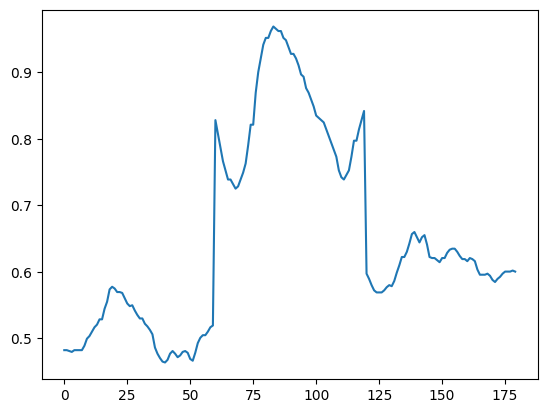

In [ ]:
plt.plot(Xtrain[25,:])

In [ ]:
YtrainIni=np.zeros((50,1)) #
for i in range(10):
    YtrainIni[i]=0 # Fine

for i in range(10,20):
    YtrainIni[i]=1 # Hello

for i in range(20,30):
    YtrainIni[i]=2 # Sorry

for i in range(30,40):
    YtrainIni[i]=3 # Thank you

for i in range(40,50):
    YtrainIni[i]=4 # Yes

Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


['fine.40l1cvep.ingestion-654c8ddcd7-98jk5.s6.json', 'fine.40l1e40d.ingestion-654c8ddcd7-2dhss.s6.json', 'fine.40l1ej0i.ingestion-654c8ddcd7-ln5rj.s5.json', 'fine.40l1ej0i.ingestion-654c8ddcd7-ln5rj.s6.json', 'hello.40l0hppc.ingestion-654c8ddcd7-98jk5.s4.json', 'hello.40l0k8pj.ingestion-654c8ddcd7-2dhss.s4.json', 'hello.40l0k8pj.ingestion-654c8ddcd7-2dhss.s5.json', 'hello.40l0lvsp.ingestion-654c8ddcd7-2dhss.s5.json', 'sorry.40l15dab.ingestion-654c8ddcd7-ln5rj.s5.json', 'sorry.40l15dab.ingestion-654c8ddcd7-ln5rj.s6.json', 'sorry.40l162lf.ingestion-654c8ddcd7-98jk5.s7.json', 'sorry.40l16q6u.ingestion-654c8ddcd7-2dhss.s6.json', 'thankyou.40l0q9j6.ingestion-654c8ddcd7-2dhss.s6.json', 'thankyou.40l0qqpl.ingestion-654c8ddcd7-ln5rj.s4.json', 'thankyou.40l0qqpl.ingestion-654c8ddcd7-ln5rj.s5.json', 'thankyou.40l0qqpl.ingestion-654c8ddcd7-ln5rj.s7.json', 'yes.40l0u3tc.ingestion-654c8ddcd7-98jk5.s5.json', 'yes.40l0u3tc.ingestion-654c8ddcd7-98jk5.s6.json', 'yes.40l0uotv.ingestion-654c8ddcd7-2dhss.

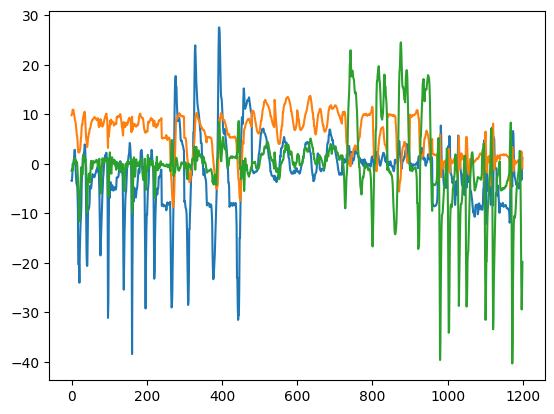

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Entregable1/Movimiento/testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*60,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*60:(i+1)*60] = DatosOriNP[0:60]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

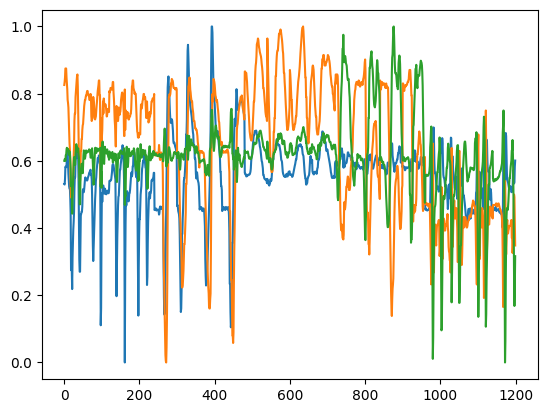

In [ ]:
scaler3 = MinMaxScaler()
scaler3.fit(DatosVal)
DatosValN=scaler3.transform(DatosVal)
plt.plot(DatosValN)

In [ ]:
XVal=np.zeros((20,180))
for i in range(20):
    XVal[i,:]=np.concatenate((DatosValN[i*60:(i+1)*60,0].T,
                              DatosValN[i*60:(i+1)*60,1].T,
                              DatosValN[i*60:(i+1)*60,2].T),axis=0)

print(XVal.shape)


(20, 180)


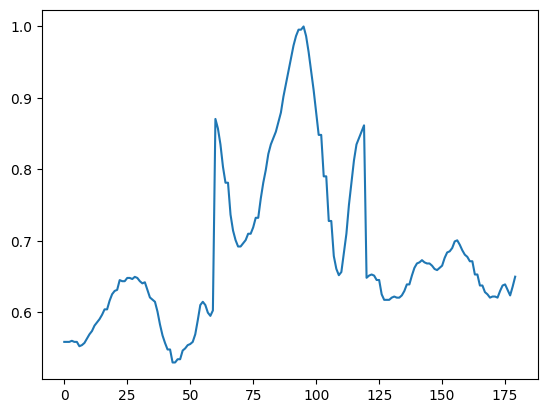

In [ ]:
plt.plot(XVal[10,:])

In [ ]:
YValIni=np.zeros((20,1))
for i in range(4):
    YValIni[i]=0

for i in range(4,8):
    YValIni[i]=1

for i in range(8,12):
    YValIni[i]=2   

for i in range(12,16):
    YValIni[i]=3   

for i in range(16,20):
    YValIni[i]=4   
    
YVal= to_categorical(YValIni)

print(YVal)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


## Código AR MLP

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                3620      
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 3,885
Trainable params: 3,885
Non-trainable params: 0
_________________________________________________________________


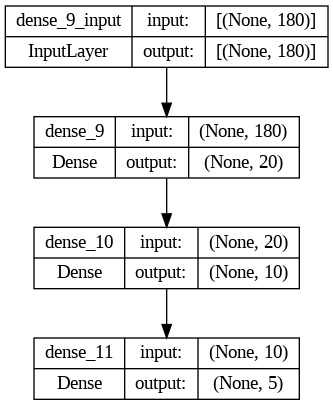

In [ ]:
#Definición del modelo
modelo2MLP = Sequential()
modelo2MLP.add(Dense(20,input_shape=(180,),activation='relu'))
modelo2MLP.add(Dense(10,activation='relu'))
modelo2MLP.add(Dense(5, activation = 'softmax'))

modelo2MLP.summary()

keras.utils.plot_model(modelo2MLP, to_file='modelo2MLP_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo2MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia2MLP = modelo2MLP.fit(Xtrain,Ytrain, epochs=400,validation_data=(XVal,YVal),verbose=1)

Epoch 1/400
2/2 [==============================] - 1s 215ms/step - loss: 1.7144 - accuracy: 0.2000 - val_loss: 1.6440 - val_accuracy: 0.2000
Epoch 2/400
2/2 [==============================] - 0s 35ms/step - loss: 1.6562 - accuracy: 0.2000 - val_loss: 1.6136 - val_accuracy: 0.2000
Epoch 3/400
2/2 [==============================] - 0s 33ms/step - loss: 1.6262 - accuracy: 0.2000 - val_loss: 1.5904 - val_accuracy: 0.2500
Epoch 4/400
2/2 [==============================] - 0s 33ms/step - loss: 1.6043 - accuracy: 0.2400 - val_loss: 1.5723 - val_accuracy: 0.2000
Epoch 5/400
2/2 [==============================] - 0s 49ms/step - loss: 1.5859 - accuracy: 0.2200 - val_loss: 1.5593 - val_accuracy: 0.3000
Epoch 6/400
2/2 [==============================] - 0s 32ms/step - loss: 1.5706 - accuracy: 0.2200 - val_loss: 1.5547 - val_accuracy: 0.3000
Epoch 7/400
2/2 [==============================] - 0s 34ms/step - loss: 1.5650 - accuracy: 0.2200 - val_loss: 1.5476 - val_accuracy: 0.3000
Epoch 8/400
2/2 [==

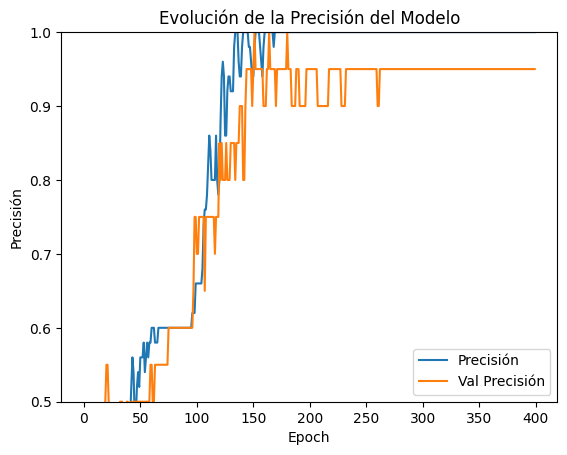

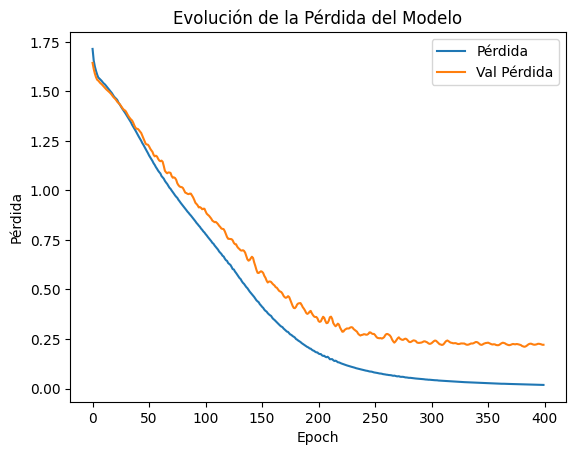

In [ ]:
plt.plot(historia2MLP.history['accuracy'], label='Precisión')
plt.plot(historia2MLP.history['val_accuracy'], label='Val Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia2MLP.history['loss'], label='Pérdida')
plt.plot(historia2MLP.history['val_loss'], label='Val Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

In [ ]:
modelo2MLP.evaluate(XVal, YVal)

1/1 [==============================] - 0s 145ms/step - loss: 0.2209 - accuracy: 0.9500


[0.22085511684417725, 0.949999988079071]

1/1 [==============================] - 0s 153ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

[[4 0 0 0 0]
 [0 3 0 0 1]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


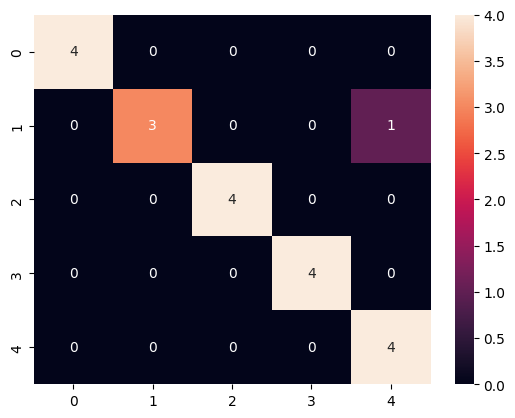

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo2MLP.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

## Codigo conv 1D

In [ ]:
Xtrain=np.zeros((50,60,3)) #datos.shape[1]/60

for i in range(50):
    Xtrain[i,:,0]=DatosN[i*60:(i+1)*60,0].T
    Xtrain[i,:,1]=DatosN[i*60:(i+1)*60,1].T
    Xtrain[i,:,2]=DatosN[i*60:(i+1)*60,2].T

print(Xtrain.shape)


(50, 60, 3)


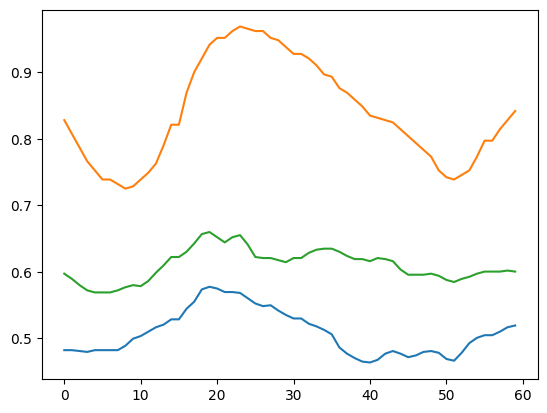

In [ ]:
plt.plot(Xtrain[25,:])

In [ ]:
XVal=np.zeros((20,60, 3))

for i in range(20):
    XVal[i,:,0]=DatosValN[i*60:(i+1)*60,0].T
    XVal[i,:,1]=DatosValN[i*60:(i+1)*60,1].T
    XVal[i,:,2]=DatosValN[i*60:(i+1)*60,2].T

print(XVal.shape)


(20, 60, 3)


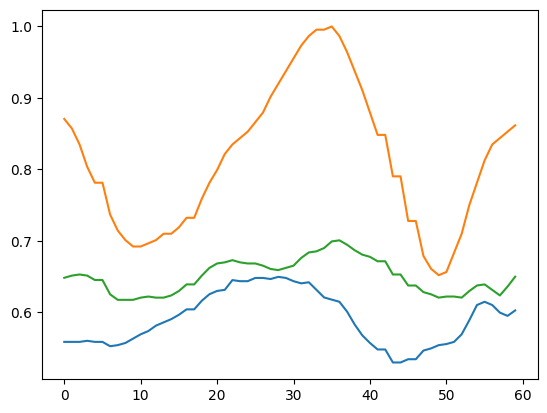

In [ ]:
plt.plot(XVal[10,:])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 16)            160       
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 32)            1568      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense_12 (Dense)            (None, 5)                 4805      
                                                                 
Total params: 6,533
Trainable params: 6,533
Non-trainable params: 0
____________________________________________________

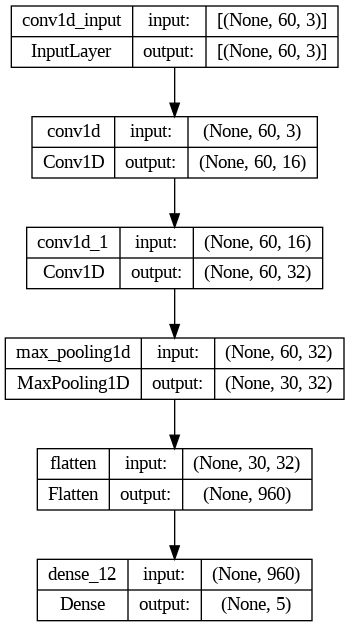

In [ ]:
# Se crea el modelo secuencial en Keras con capas densas
modelo2con1D = keras.models.Sequential()
modelo2con1D.add(keras.layers.Conv1D(16,3, activation="relu",padding="same", input_shape=(60,3)))
modelo2con1D.add(keras.layers.Conv1D(32,3, activation="relu",padding="same"))
modelo2con1D.add(keras.layers.MaxPooling1D(pool_size=2,strides=2, padding='same'))
modelo2con1D.add(keras.layers.Flatten())
modelo2con1D.add(keras.layers.Dense(5, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo2con1D.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo2con1D, to_file='model2con1D_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo2con1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia2con1D = modelo2con1D.fit(Xtrain,Ytrain, validation_data=(XVal,YVal), epochs=400,batch_size=None,verbose=1)

Epoch 1/400
2/2 [==============================] - 5s 889ms/step - loss: 1.6206 - accuracy: 0.1200 - val_loss: 1.5949 - val_accuracy: 0.3500
Epoch 2/400
2/2 [==============================] - 0s 87ms/step - loss: 1.6014 - accuracy: 0.1600 - val_loss: 1.5872 - val_accuracy: 0.2000
Epoch 3/400
2/2 [==============================] - 0s 54ms/step - loss: 1.5930 - accuracy: 0.2400 - val_loss: 1.5796 - val_accuracy: 0.2000
Epoch 4/400
2/2 [==============================] - 0s 70ms/step - loss: 1.5861 - accuracy: 0.2000 - val_loss: 1.5711 - val_accuracy: 0.2000
Epoch 5/400
2/2 [==============================] - 0s 119ms/step - loss: 1.5760 - accuracy: 0.2200 - val_loss: 1.5620 - val_accuracy: 0.3000
Epoch 6/400
2/2 [==============================] - 0s 155ms/step - loss: 1.5675 - accuracy: 0.2800 - val_loss: 1.5528 - val_accuracy: 0.4000
Epoch 7/400
2/2 [==============================] - 0s 78ms/step - loss: 1.5564 - accuracy: 0.3800 - val_loss: 1.5445 - val_accuracy: 0.5000
Epoch 8/400
2/2 [

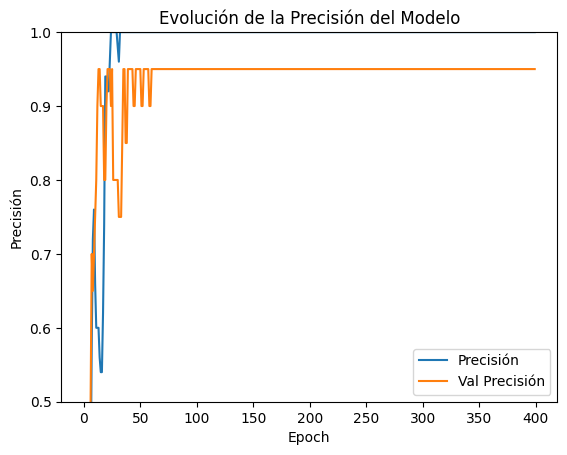

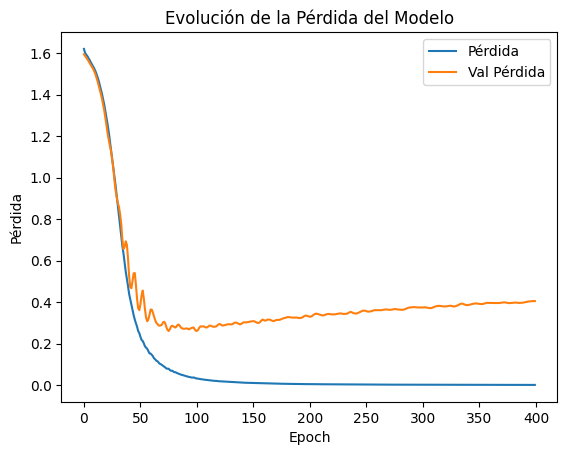

In [ ]:
plt.plot(historia2con1D.history['accuracy'], label='Precisión')
plt.plot(historia2con1D.history['val_accuracy'], label='Val Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia2con1D.history['loss'], label='Pérdida')
plt.plot(historia2con1D.history['val_loss'], label='Val Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

In [ ]:
modelo2con1D.evaluate(XVal, YVal)

1/1 [==============================] - 0s 28ms/step - loss: 0.4050 - accuracy: 0.9500


[0.40500321984291077, 0.949999988079071]

1/1 [==============================] - 0s 79ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       0.80      1.00      0.89         4

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

[[4 0 0 0 0]
 [0 3 0 0 1]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


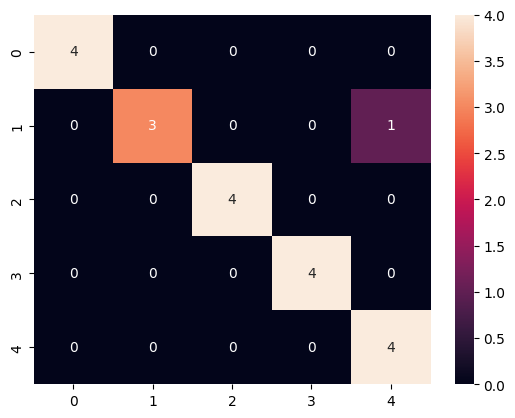

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo2con1D.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

#Código basado en
 * Sandeep Mistry - Arduino
 * Don Coleman - Chariot Solutions

 
https://github.com/arduino/ArduinoTensorFlowLiteTutorials/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Intalación de las dependencias necesarias
!apt-get -qq install xxd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
pip install everywhereml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for everywhereml: filename=everywhereml-0.2.21-py3-none-any.whl size=78288 sha256=ed9146a907686ab2c29646737b0188d2615c038da7df8acf832ccf89b9fc7006
  Stored in directory: /root/.cache/pip/wheels/a6/00/05/de8c9c07012ec7ddc9d40989c08787ed5d16d3cbca90bdf33a
  Created wheel for hexdump: filename=hexdump-3.3-py3-none-any.whl size=8897 sha256=e22d6ceb29ebe474fc1f13ad57bbfd68f2e1a705fa376fbab4a2accfd0890d33
  Stored in directory: /root/.cache/pip/wheels/26/28/f7/f47d7ecd9ae44c4457e72c8

<ipython-input-4-0559c6c9670c>:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-0559c6c9670c>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-0559c6c9670c>:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


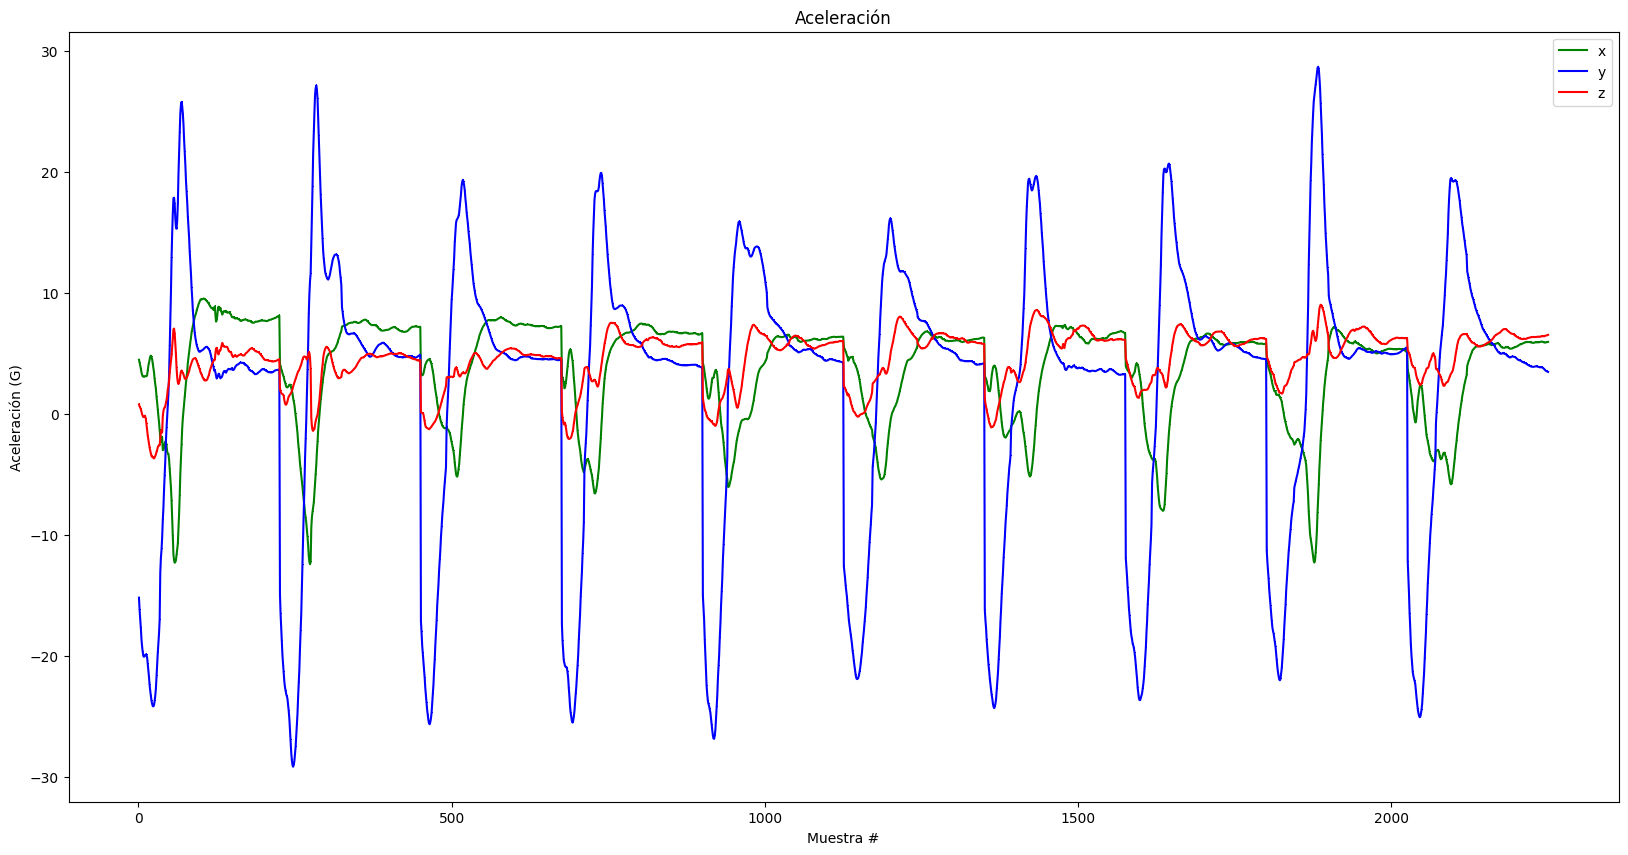

<ipython-input-4-0559c6c9670c>:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-4-0559c6c9670c>:20: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-4-0559c6c9670c>:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


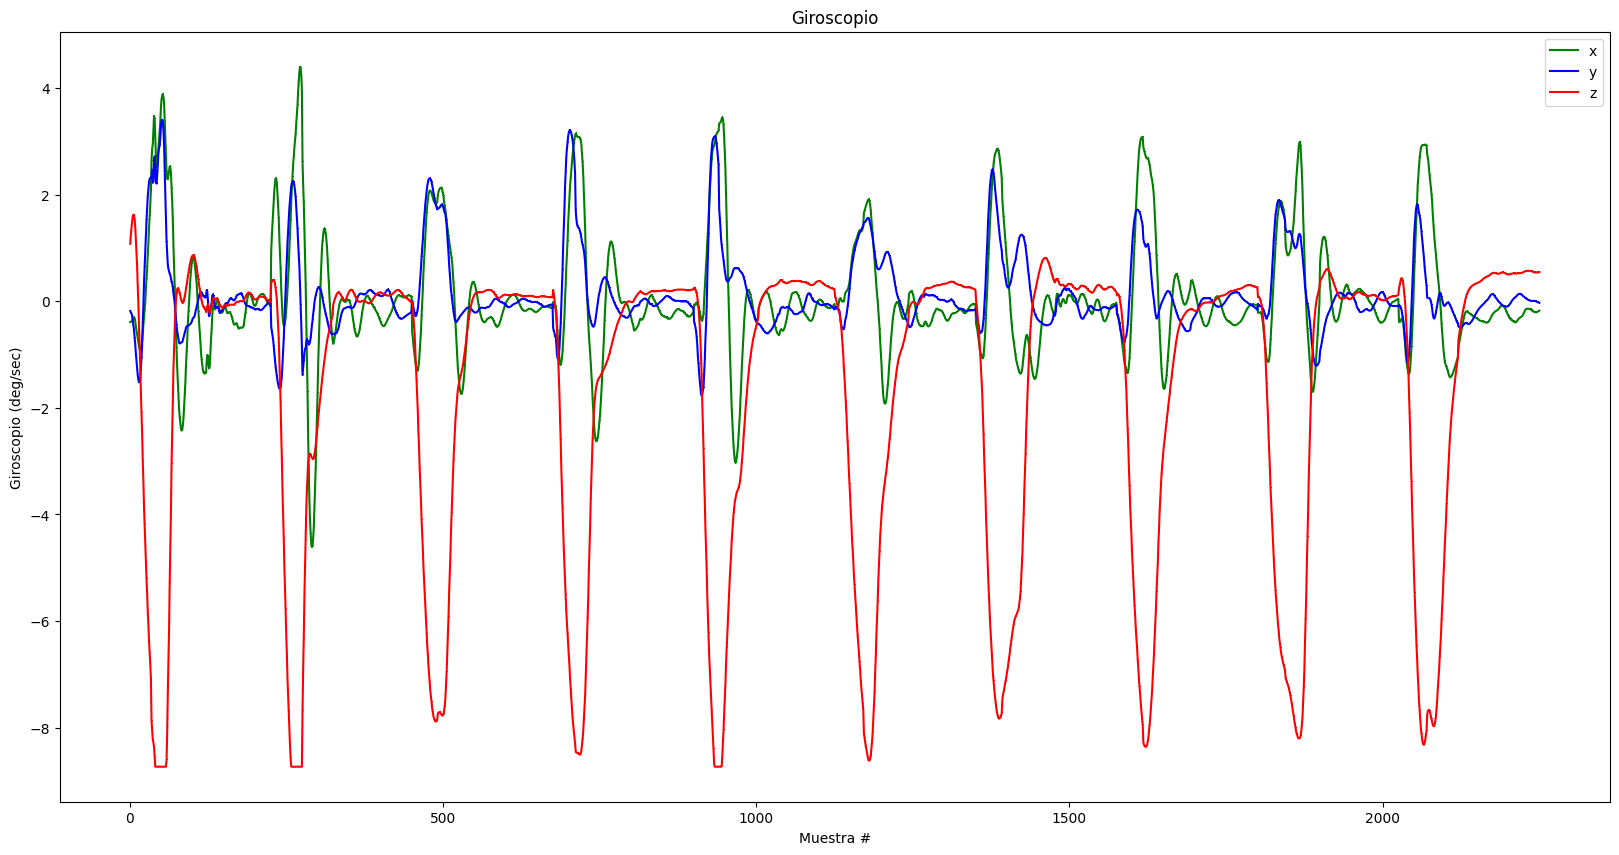

In [ ]:

filename = "/content/gdrive/MyDrive/Proyecto_IAIOT/yes.csv"

df = pd.read_csv(filename)


index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Aceleración")
plt.xlabel("Muestra #")
plt.ylabel("Aceleración (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Giroscopio")
plt.xlabel("Muestra #")
plt.ylabel("Giroscopio (deg/sec)")
plt.legend()
plt.show()


In [ ]:

#print(f"TensorFlow version = {tf.__version__}\n")
# Establezca un valor semilla aleatorio fijo, para la reproducibilidad, esto nos permitirá obtener
# los mismos números aleatorios cada vez que se ejecuta el cuaderno
SEED = 123
np.random.seed(SEED)
tf.random.set_seed(SEED)

# la lista de gestos para los que hay datos disponibles
GESTURES = [
    "fine",
    "hello",
    "sorry",
    "thankyou",
    "yes"
]

SAMPLES_PER_GESTURE = 225

NUM_GESTURES = len(GESTURES)

# crear una matriz codificada one-hot que se utiliza en la salida
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# leer cada archivo csv y enviar una entrada y una salida
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Procesando índice {gesture_index} para gesto '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/gdrive/MyDrive/Proyecto_IAIOT/" + gesture + ".csv")
  
# calcular el número de grabaciones de gestos en el archivo
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tHay {num_recordings} grabaciones del gesto {gesture}.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalizar los datos de entrada, entre 0 y 1:
      # - la aceleración está entre: -4 a +4
      # - el giroscopio está entre: -2000 a +2000
      tensor += [
          (df['aX'][index] + 30) / 60,
          (df['aY'][index] + 30) / 60,
          (df['aZ'][index] + 30) / 60,
          (df['gX'][index] + 8) / 16,
          (df['gY'][index] + 8) / 16,
          (df['gZ'][index] + 8) / 16
      ]

    inputs.append(tensor)
    outputs.append(output)

# convertir la lista en una matriz numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Se completó el análisis y la preparación del conjunto de datos.")

Procesando índice 0 para gesto 'fine'.
	Hay 10 grabaciones del gesto fine.
Procesando índice 1 para gesto 'hello'.
	Hay 10 grabaciones del gesto hello.
Procesando índice 2 para gesto 'sorry'.
	Hay 10 grabaciones del gesto sorry.
Procesando índice 3 para gesto 'thankyou'.
	Hay 10 grabaciones del gesto thankyou.
Procesando índice 4 para gesto 'yes'.
	Hay 10 grabaciones del gesto yes.
Se completó el análisis y la preparación del conjunto de datos.


In [ ]:
# Aleatorice el orden de las entradas, de modo que puedan distribuirse uniformemente para el entrenamiento, la prueba y la validación
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Intercambiar los índices consecutivos (0, 1, 2, etc.) con los índices aleatorios
inputs = inputs[randomize]
outputs = outputs[randomize]

# Divida las grabaciones (grupo de muestras) en tres conjuntos: entrenamiento, prueba y validación
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Se completó la aleatorización y división del conjunto de datos.")

Se completó la aleatorización y división del conjunto de datos.


In [ ]:
# Definición y entrenamiento del modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) 
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 


Epoch 1/100
30/30 [==============================] - 2s 18ms/step - loss: 0.1841 - accuracy: 0.1000 - val_loss: 0.1620 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 0.1607 - accuracy: 0.2667 - val_loss: 0.1448 - val_accuracy: 0.5000
Epoch 3/100
30/30 [==============================] - 0s 12ms/step - loss: 0.1480 - accuracy: 0.3333 - val_loss: 0.1375 - val_accuracy: 0.6000
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.1376 - accuracy: 0.4667 - val_loss: 0.1299 - val_accuracy: 0.3000
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.1226 - accuracy: 0.4667 - val_loss: 0.1334 - val_accuracy: 0.3000
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1186 - accuracy: 0.5000 - val_loss: 0.1332 - val_accuracy: 0.3000
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.5000 - val_loss: 0.1243 - val_accuracy: 0.3000
Epoch 8/10

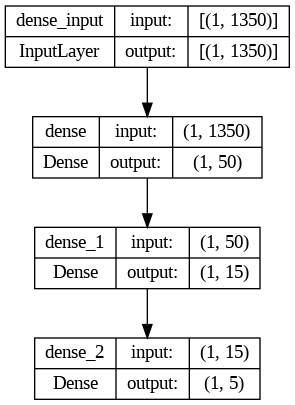

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, validation_data=(inputs_validate, outputs_validate))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


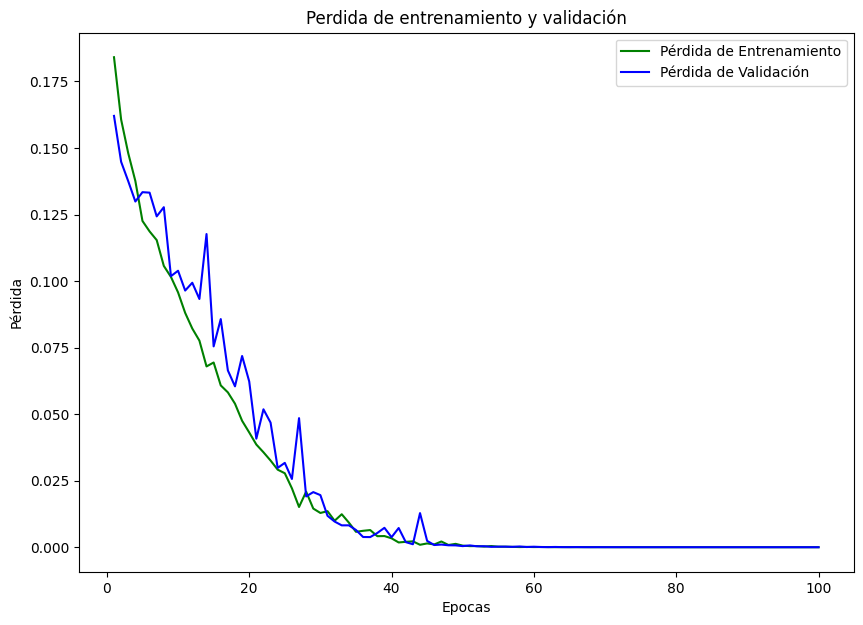

[10.0, 7.0]


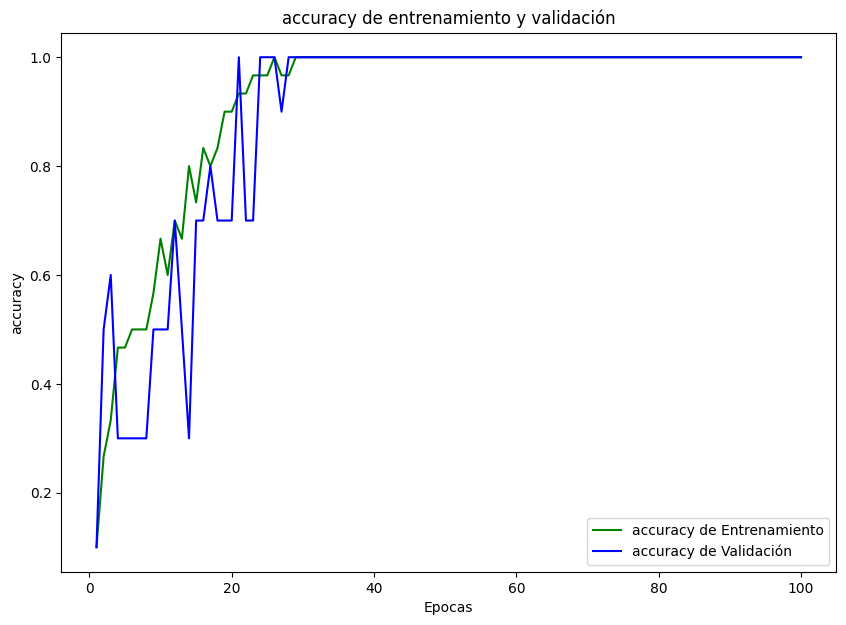

[10.0, 7.0]


In [ ]:
# aumentar el tamaño de los gráficos. El tamaño predeterminado es (6,4).
plt.rcParams["figure.figsize"] = (10,7)

# graficar la pérdida, el modelo anterior está configurado para usar "error cuadrático medio" como la función de pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Perdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

# aumentar el tamaño de los gráficos. El tamaño predeterminado es (6,4).
plt.rcParams["figure.figsize"] = (10,7)

# graficar la pérdida, el modelo anterior está configurado para usar "error cuadrático medio" como la función de pérdida
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='accuracy de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='accuracy de Validación')
plt.title('accuracy de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [ ]:
# usar el modelo para predecir las entradas de prueba
predictions = model.predict(inputs_test)

# imprime las predicciones y los resultados esperados
print("predicciones =\n", np.round(predictions, decimals=3))
print("reales =\n", outputs_test)



1/1 [==============================] - 0s 380ms/step
predicciones =
 [[0.999 0.    0.    0.001 0.   ]
 [0.    0.996 0.002 0.    0.002]
 [0.001 0.    0.003 0.996 0.   ]
 [0.    0.997 0.002 0.    0.001]
 [0.    0.001 0.006 0.    0.993]
 [0.    0.001 0.997 0.    0.001]
 [0.    0.    0.004 0.995 0.   ]
 [0.001 0.    0.002 0.997 0.   ]
 [0.997 0.    0.    0.003 0.   ]
 [0.002 0.    0.002 0.996 0.   ]]
reales =
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [0 0 0 4 0]
 [0 0 0 0 1]]


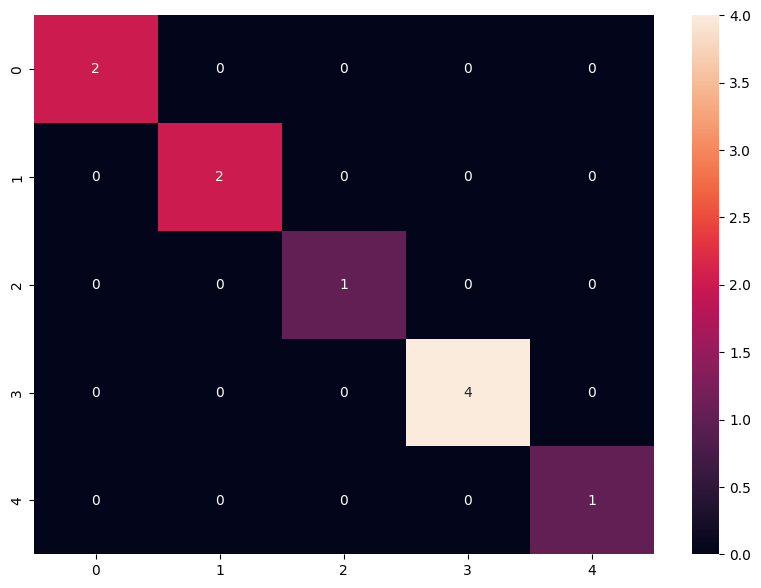

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_test_class = np.argmax(outputs_test,axis=1) 
y_pred_class = np.argmax(predictions,axis=1) 

#Exactitud de los valores predichos
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

# visualizar la matriz de confusión en un mapa de calor
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
# Se convierte el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
modelo_tflite = converter.convert()

In [ ]:
# Se guarda el modelo 
open("/content/modelo.tflite","wb").write(modelo_tflite)

275672

In [ ]:
from everywhereml.code_generators.tensorflow import tf_porter

In [ ]:
#model.fit(inputs_train, outputs_train
porter = tf_porter(model, inputs_train, outputs_train)
cpp_code = porter.to_cpp(instance_name='MovimientoNN', arena_size=4096)

print(cpp_code)

#ifndef UUID139786138786768
#define UUID139786138786768

#include <EloquentTinyML.h>
#include <eloquent_tinyml/tensorflow.h>

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

#ifndef ARENA_SIZE
#define ARENA_SIZE 4096
#endif

/** model size = 275672 bytes **/
const unsigned char modelData[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0xa8, 0x2e, 0x04, 0x00, 0xb8, 0x2e, 0x04, 0x00, 0x74, 0x34, 0x04, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c,